In [1]:
import torch
from torch.optim import Adam
from torch.nn import Linear,MSELoss,Sequential,Sigmoid,Softmax,ReLU,Module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score
import seaborn as sb
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [ ]:
iris데이터셋을 이용
1. 정규화
2. train, test
3. class 기반 딥러닝
4. 학습간 정확도 출력
5. test데이터 0번째 행 예측값 확인
6. 검증
- train, test f1 score
- confusion matrix, heat map

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame( iris['data'] )
df.columns = iris['feature_names']
df['species'] = iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
x_data = df.iloc[:,:-1].values
y_data = pd.get_dummies( df['species'] ).values

In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [6]:
scaleF = MinMaxScaler()
x_dataN = scaleF.fit_transform( x_data )

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x_dataN, y_data, 
                                               test_size=0.3, stratify=y_data)

In [8]:
x_train.shape

(105, 4)

In [9]:
y_train.shape

(105, 3)

In [11]:
x = torch.FloatTensor( x_train )
y = torch.FloatTensor( y_train )

In [15]:
class IrisModel( Module ):
    def __init__(self):
        super().__init__() #초기화작업
        self.nn1 = Linear(4,20)
        self.relu1 = ReLU()
        self.nn2 = Linear(20,3)
        self.soft1 = Softmax(dim=1)

    def forward(self, x):
        print('foward call')
        x = self.nn1( x ) # matmul( x,w1)+b1 w1:2x20
        x = self.relu1( x ) 
        x = self.nn2( x ) # matmul( x,w2)+b2 w1:20x1
        x = self.soft1( x )# 
        return x

In [16]:
model = IrisModel()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = Adam( model.parameters(), lr=0.01)
for epoch in range(1000):
    optimizer.zero_grad()
    hx = model(x) #model.forward(x)
    cost = loss_fn( hx, y)
    cost.backward()
    optimizer.step()
    print('--------------------------')
    rdata = y.argmax(dim=1).numpy()
    pred = hx.argmax(dim=1).numpy()
    print('정확도', accuracy_score(rdata,pred) )
    print(epoch, cost.item() )

foward call
--------------------------
정확도 0.3333333333333333
0 1.1039807796478271
foward call
--------------------------
정확도 0.3333333333333333
1 1.0960946083068848
foward call
--------------------------
정확도 0.3333333333333333
2 1.0885790586471558
foward call
--------------------------
정확도 0.6571428571428571
3 1.0813977718353271
foward call
--------------------------
정확도 0.6571428571428571
4 1.0742748975753784
foward call
--------------------------
정확도 0.6571428571428571
5 1.0670225620269775
foward call
--------------------------
정확도 0.6666666666666666
6 1.0595972537994385
foward call
--------------------------
정확도 0.6666666666666666
7 1.0518800020217896
foward call
--------------------------
정확도 0.6666666666666666
8 1.0439157485961914
foward call
--------------------------
정확도 0.6666666666666666
9 1.0355883836746216
foward call
--------------------------
정확도 0.6666666666666666
10 1.0268566608428955
foward call
--------------------------
정확도 0.6666666666666666
11 1.0176868438720703
fo

--------------------------
정확도 0.9809523809523809
205 0.5848444104194641
foward call
--------------------------
정확도 0.9809523809523809
206 0.5847262144088745
foward call
--------------------------
정확도 0.9809523809523809
207 0.58460932970047
foward call
--------------------------
정확도 0.9809523809523809
208 0.58449387550354
foward call
--------------------------
정확도 0.9809523809523809
209 0.5843798518180847
foward call
--------------------------
정확도 0.9809523809523809
210 0.5842685103416443
foward call
--------------------------
정확도 0.9809523809523809
211 0.5841575860977173
foward call
--------------------------
정확도 0.9809523809523809
212 0.5840476751327515
foward call
--------------------------
정확도 0.9809523809523809
213 0.5839400291442871
foward call
--------------------------
정확도 0.9809523809523809
214 0.5838335752487183
foward call
--------------------------
정확도 0.9809523809523809
215 0.583728015422821
foward call
--------------------------
정확도 0.9809523809523809
216 0.58362424373626

--------------------------
정확도 0.9809523809523809
390 0.574616014957428
foward call
--------------------------
정확도 0.9809523809523809
391 0.5745875239372253
foward call
--------------------------
정확도 0.9809523809523809
392 0.574559211730957
foward call
--------------------------
정확도 0.9809523809523809
393 0.5745309591293335
foward call
--------------------------
정확도 0.9809523809523809
394 0.5745028853416443
foward call
--------------------------
정확도 0.9809523809523809
395 0.5744750499725342
foward call
--------------------------
정확도 0.9809523809523809
396 0.5744469165802002
foward call
--------------------------
정확도 0.9809523809523809
397 0.5744189620018005
foward call
--------------------------
정확도 0.9809523809523809
398 0.5743911862373352
foward call
--------------------------
정확도 0.9809523809523809
399 0.5743635892868042
foward call
--------------------------
정확도 0.9809523809523809
400 0.5743357539176941
foward call
--------------------------
정확도 0.9809523809523809
401 0.57430851459

foward call
--------------------------
정확도 0.9904761904761905
526 0.5714147090911865
foward call
--------------------------
정확도 0.9904761904761905
527 0.5713946223258972
foward call
--------------------------
정확도 0.9904761904761905
528 0.5713745951652527
foward call
--------------------------
정확도 0.9904761904761905
529 0.5713551640510559
foward call
--------------------------
정확도 0.9904761904761905
530 0.571334719657898
foward call
--------------------------
정확도 0.9904761904761905
531 0.5713149309158325
foward call
--------------------------
정확도 0.9904761904761905
532 0.5712950229644775
foward call
--------------------------
정확도 0.9904761904761905
533 0.5712756514549255
foward call
--------------------------
정확도 0.9904761904761905
534 0.5712555050849915
foward call
--------------------------
정확도 0.9904761904761905
535 0.571235716342926
foward call
--------------------------
정확도 0.9904761904761905
536 0.5712161064147949
foward call
--------------------------
정확도 0.9904761904761905
537 0

--------------------------
정확도 0.9904761904761905
720 0.56788170337677
foward call
--------------------------
정확도 0.9904761904761905
721 0.5678649544715881
foward call
--------------------------
정확도 0.9904761904761905
722 0.5678481459617615
foward call
--------------------------
정확도 0.9904761904761905
723 0.5678303837776184
foward call
--------------------------
정확도 0.9904761904761905
724 0.5678179264068604
foward call
--------------------------
정확도 0.9904761904761905
725 0.5677990317344666
foward call
--------------------------
정확도 0.9904761904761905
726 0.5677854418754578
foward call
--------------------------
정확도 0.9904761904761905
727 0.5677692890167236
foward call
--------------------------
정확도 0.9904761904761905
728 0.5677510499954224
foward call
--------------------------
정확도 0.9904761904761905
729 0.5677365064620972
foward call
--------------------------
정확도 0.9904761904761905
730 0.567717969417572
foward call
--------------------------
정확도 0.9904761904761905
731 0.567702412605

--------------------------
정확도 0.9904761904761905
895 0.5657220482826233
foward call
--------------------------
정확도 0.9904761904761905
896 0.565709114074707
foward call
--------------------------
정확도 0.9904761904761905
897 0.5657017230987549
foward call
--------------------------
정확도 0.9904761904761905
898 0.5656912326812744
foward call
--------------------------
정확도 0.9904761904761905
899 0.5656818747520447
foward call
--------------------------
정확도 0.9904761904761905
900 0.5656731128692627
foward call
--------------------------
정확도 0.9904761904761905
901 0.5656632781028748
foward call
--------------------------
정확도 0.9904761904761905
902 0.5656548738479614
foward call
--------------------------
정확도 0.9904761904761905
903 0.5656445026397705
foward call
--------------------------
정확도 0.9904761904761905
904 0.565636932849884
foward call
--------------------------
정확도 0.9904761904761905
905 0.5656277537345886
foward call
--------------------------
정확도 0.9904761904761905
906 0.56561887264

### 검증

In [22]:
x.shape
105x4 4x20 = 105x20 20x3 = 105x3 

torch.Size([105, 4])

In [26]:
r = y.argmax(dim=1).numpy()
h = model( x ).argmax( dim=1).detach().numpy()

foward call


In [30]:
# train f1 score
f1_score(r,h, average='macro')

0.9904742464448527

In [ ]:
45x4 4x20 = 45x20 20x3  45x3

In [43]:
r = y_test.argmax( axis=1 )
p = model( torch.FloatTensor(x_test)).argmax(dim=1).detach().numpy()

foward call


In [44]:
# test f1 score
f1_score(r,p, average='macro')

0.9777530589543938

In [45]:
confusion_matrix(r,p)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]], dtype=int64)

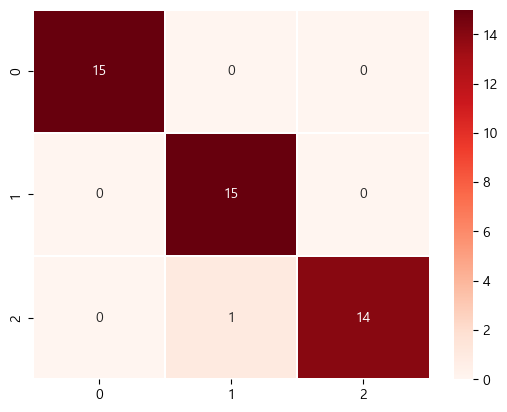

In [49]:
sb.heatmap(confusion_matrix(r,p),annot=True,linewidths=0.2,cmap='Reds')
plt.show()